In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
cohere_api_key = os.getenv("COHERE_API_KEY")

In [88]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from langchain_cohere.llms import Cohere


# Define functions for tools
def fetch_stock_data(ticker: str) -> pd.DataFrame:
    stock_data = yf.download(ticker, period="6mo")  # 6 months of data
    stock_data.index = stock_data.index.astype(str)
    if stock_data.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock_data

def calculate_moving_averages_tool(data: pd.DataFrame, short_window: int = 10, long_window: int = 50) -> pd.DataFrame:
    if data.empty:
        raise ValueError("Stock data is empty.")
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    return data

def visualize_tool(data: pd.DataFrame, ticker: str) -> str:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label="Closing Price", alpha=0.75)
    plt.plot(data.index, data['Short_MA'], label="Short MA (10 days)", linestyle='--')
    plt.plot(data.index, data['Long_MA'], label="Long MA (50 days)", linestyle='--')
    plt.title(f"Stock Price and Moving Averages for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    image_path = f"{ticker}_moving_averages_chart.png"
    plt.show()

In [89]:
ticker = "TSLA"
stock_data = fetch_stock_data(ticker)

[*********************100%***********************]  1 of 1 completed


In [90]:
window=10

In [91]:
moving_average = stock_data['Close'].rolling(window=window).mean() #.replace({float('nan'): None})

In [92]:
type(moving_average.index[0])

str

In [93]:
original_dict = moving_average.to_dict()
ticker, data = list(original_dict.items())[0] 
transformed_dict = {
    "ticker": ticker,
    "info": f"Moving Average (window={window})",
    "data": data
}
transformed_dict

{'ticker': 'TSLA',
 'info': 'Moving Average (window=10)',
 'data': {'2024-05-22': nan,
  '2024-05-23': nan,
  '2024-05-24': nan,
  '2024-05-28': nan,
  '2024-05-29': nan,
  '2024-05-30': nan,
  '2024-05-31': nan,
  '2024-06-03': nan,
  '2024-06-04': nan,
  '2024-06-05': 176.89600067138673,
  '2024-06-06': 176.6790008544922,
  '2024-06-07': 177.0529998779297,
  '2024-06-10': 176.50799865722655,
  '2024-06-11': 175.8989990234375,
  '2024-06-12': 176.00899810791014,
  '2024-06-13': 176.3769989013672,
  '2024-06-14': 176.3699981689453,
  '2024-06-17': 177.48499908447266,
  '2024-06-18': 178.4939987182617,
  '2024-06-20': 179.1509994506836,
  '2024-06-21': 179.65799865722656,
  '2024-06-24': 180.16799926757812,
  '2024-06-25': 181.5240005493164,
  '2024-06-26': 184.09499969482422,
  '2024-06-27': 186.10800018310547,
  '2024-06-28': 187.6490005493164,
  '2024-07-01': 190.83400115966796,
  '2024-07-02': 195.21600036621095,
  '2024-07-03': 201.36900024414064,
  '2024-07-05': 208.36399993896484

In [96]:
import json
json_string = json.dumps(transformed_dict, separators=(',', ':'))

print(json_string)

{"ticker":"TSLA","info":"Moving Average (window=10)","data":{"2024-05-22":NaN,"2024-05-23":NaN,"2024-05-24":NaN,"2024-05-28":NaN,"2024-05-29":NaN,"2024-05-30":NaN,"2024-05-31":NaN,"2024-06-03":NaN,"2024-06-04":NaN,"2024-06-05":176.89600067138673,"2024-06-06":176.6790008544922,"2024-06-07":177.0529998779297,"2024-06-10":176.50799865722655,"2024-06-11":175.8989990234375,"2024-06-12":176.00899810791014,"2024-06-13":176.3769989013672,"2024-06-14":176.3699981689453,"2024-06-17":177.48499908447266,"2024-06-18":178.4939987182617,"2024-06-20":179.1509994506836,"2024-06-21":179.65799865722656,"2024-06-24":180.16799926757812,"2024-06-25":181.5240005493164,"2024-06-26":184.09499969482422,"2024-06-27":186.10800018310547,"2024-06-28":187.6490005493164,"2024-07-01":190.83400115966796,"2024-07-02":195.21600036621095,"2024-07-03":201.36900024414064,"2024-07-05":208.36399993896484,"2024-07-08":215.35700073242188,"2024-07-09":223.33199920654297,"2024-07-10":230.9229995727539,"2024-07-11":235.38899993896

In [94]:
type(list(transformed_dict['data'].keys())[0])

str

In [78]:
closing_price = stock_data['Close']
original_dict = closing_price.to_dict()
ticker, data = list(original_dict.items())[0] 
transformed_dict = {
    "ticker": ticker,
    "info": f"Closing Price",
    "data": data
}

transformed_dict

{'ticker': 'TSLA',
 'info': 'Closing Price',
 'data': {Timestamp('2024-05-22 00:00:00'): 180.11000061035156,
  Timestamp('2024-05-23 00:00:00'): 173.74000549316406,
  Timestamp('2024-05-24 00:00:00'): 179.24000549316406,
  Timestamp('2024-05-28 00:00:00'): 176.75,
  Timestamp('2024-05-29 00:00:00'): 176.19000244140625,
  Timestamp('2024-05-30 00:00:00'): 178.7899932861328,
  Timestamp('2024-05-31 00:00:00'): 178.0800018310547,
  Timestamp('2024-06-03 00:00:00'): 176.2899932861328,
  Timestamp('2024-06-04 00:00:00'): 174.77000427246094,
  Timestamp('2024-06-05 00:00:00'): 175.0,
  Timestamp('2024-06-06 00:00:00'): 177.94000244140625,
  Timestamp('2024-06-07 00:00:00'): 177.47999572753906,
  Timestamp('2024-06-10 00:00:00'): 173.7899932861328,
  Timestamp('2024-06-11 00:00:00'): 170.66000366210938,
  Timestamp('2024-06-12 00:00:00'): 177.2899932861328,
  Timestamp('2024-06-13 00:00:00'): 182.47000122070312,
  Timestamp('2024-06-14 00:00:00'): 178.00999450683594,
  Timestamp('2024-06-17 0

In [36]:
roll_10 = stock_data['Close'].ewm(span=10, adjust=False).mean().dropna()

In [37]:
roll_10.shape

(128, 1)

In [41]:
mavg = calculate_moving_averages_tool(stock_data, 5, 10)

In [42]:
mavg

Price,Adj Close,Close,High,Low,Open,Volume,Short_MA,Long_MA
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,,
2024-05-22,180.110001,180.110001,183.800003,178.119995,182.850006,88313500,NaN,NaN
2024-05-23,173.740005,173.740005,181.899994,173.259995,181.800003,71975500,NaN,NaN
2024-05-24,179.240005,179.240005,180.080002,173.729996,174.839996,65479700,NaN,NaN
2024-05-28,176.750000,176.750000,178.250000,173.160004,176.399994,59736600,NaN,NaN
2024-05-29,176.190002,176.190002,178.149994,173.929993,174.190002,54782600,177.206003,NaN
...,...,...,...,...,...,...,...,...
2024-11-15,320.720001,320.720001,324.679993,309.220001,310.570007,114440300,328.125995,304.156998
2024-11-18,338.739990,338.739990,348.549988,330.010010,340.730011,126547500,325.873993,313.746997


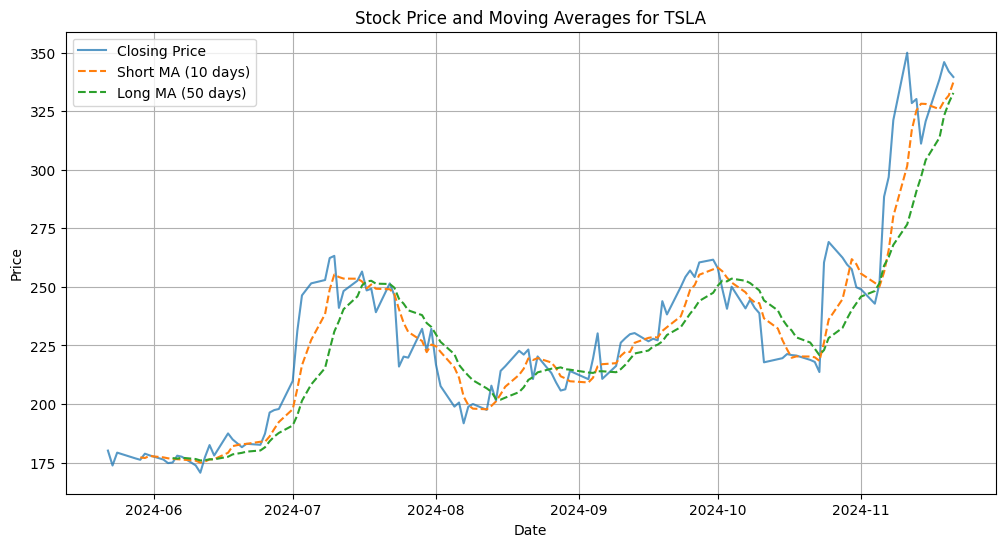

In [43]:
visualize_tool(mavg, ticker)